# K-Nearest Neighbours, Linear Regression, Naive Bayes and MLP
# Introduction

This worksheet covers the three supervised learning algorithms we looked at: k-nearest neighbours, linear regression, and the naive Bayes classifier. Similar to last week, you will do some work implementing your own versions of these algorithms, to ensure that you understand the details of them. You will also compare them with the implementations in scikit-learn to test your implementations.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# 1. K-nearest neighbours classification
In this question we will use the k-nearest neighbours algorithm to make predictions on the breast cancer Wisconsin dataset. This is a classification problem where the aim is to classify instances as either being malignant or benign based on the following 10 features: 即是一个二分类问题，根据10个特征，将数据分为良性和恶性。
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter squared/ area −1)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (‘coastline approximation’ −1)

In this question you will:
    (a) download the dataset from sklearn and store the data and targets in suitable variables, 
    (b) separate your data into a training and test split, 
    (c) (Optional) write your own function to implement k-nearest neighbours, 
    (d) (Optional) check your implementation with that of sklearn. 
    (e) select the most appropriate value of $k$ using cross-validation.

## Part (a)
Import the package `datasets` from `sklearn` and then load the breast cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`. 
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?

In [79]:
# Import suitable packages, load the dataset, and save data and targets into variables X and Y
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target
# Take a look at the data in X. How many datapoints are there? How many features does each datapoint have?
print(np.shape(X))
print(np.shape(Y))

(569, 30)
(569,)


## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [80]:
# Import the package train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split

# Split the dataset into Xtr, Xtest, Ytr, Ytest. Xtest and Ytest will form your held-out
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=0.2, random_state=10)


## (Optional) Part (c) Write your own k-nearest neighbours classifier
Recall from the lecture that the k-nearest neighbours algorithm runs as follows:

Training step: Simply store the dataset

Prediction step: Given a datapoint $\vec{x}$:
 - **Find** the k datapoints $(\vec{x}_i, y_i)$ where the distance from $\vec{x}$ to $\vec{x}_i$ is smallest
 - **Return** the majority class from the $y_i$
   
 
What, if anything, do you need to do for the training step?

Write function(s) to implement the k-nearest neighbours prediction step. You may wish to break the procedure down into two functions `predict_datapoint` that makes a prediction for one datapoint and `predict_data` that loops over the whole dataset.

To select the majority class from the nearest neighbours, you can use the function `scipy.stats.mode()`


In [81]:
from scipy.stats import mode
# Write function(s) to implement the prediction step in k-nearest neighbours. 
# You can use the suggested structure below if desired.
# predict_datapoint takes 4 arguments. pt (type: numpy array) is the datapoint we are making a prediction about, 
# Xtrain and Ytrain (numpy arrays) are training data and targets, k (int) is the number of neighbours.
# Returns an integer which is the predicted class for pt

# predict_datapoint表示预测一个点的类别，predict_data表示预测整个数据集的类别

def predict_datapoint(pt, Xtrain, Ytrain, k):
    # For each datapoint in Xtrain, calculate the distance to pt and store
    distances = []
    for i in range(len(Xtrain)):
        dist = np.sqrt(np.sum((pt - Xtrain[i])**2))
        distances.append(dist)
         
    # Sort the list of distances (hint: use np.argsort) argsort 返回的是排序后的索引
    sorted_distances = np.argsort(distances)
    
    # obtain the classes (in Ytrain) of the datapoints with the smallest distance to pt 即是找到距离最近的k个点
    classes = []
    for i in range(k):
        classes.append(Ytrain[sorted_distances[i]])
    # 该循环表示从Ytrain中找到距离最近的k个点的类别
    
    # return the mode of the classes
    # mode() 返回的是众数和众数出现的次数，因此取第一个元素即是众数，第二个元素是众数出现的次数
    return mode(classes)[0][0]


# 用predict_datapoint进行循环，预测整个数据集的类别
def predict_data(Xtst, Xtrain, Ytrain, k=3):
    #Loop over the datapoints in Xtst and store the prediction for that datapoint
    predictions = []
    for i in range(len(Xtst)):
        predictions.append(predict_datapoint(Xtst[i], Xtrain, Ytrain, k))
        
    return predictions

# Predict values for the TRAINING data (we will not look at the test set yet)
# Set k to 3
k = 3
Ypred = predict_data(Xtr, Xtr, Ytr, k)

## Part (d) Compare your implementation with sklearn's implementation
Now we can compare your implementation with the sklearn implementation (you should get the same results). Firstly import the classfifier `KNeighborsClassifier` from `sklearn.neighbors`. Instantiate the classifier with the same number of neighbours that you used previously. Fit the model and make a prediction on the test set.

In [82]:
# Import KNeighborClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier on the training data
knn.fit(Xtr, Ytr)

#Make a prediction on the training data
Ypred_sk = knn.predict(Xtr)

Check whether your predictions are the same as the predictions from `KNeighborsClassifier`.

In [83]:
# Check whether your predictions are the same as the predictions from KNeighborsClassifier
print(np.sum(Ypred == Ypred_sk))
print(np.sum(Ypred != Ypred_sk))
# 说明两者的预测结果是一样的

455
0


Use the built in metrics in sklearn to calculate the accuracy of your classifier on the TRAINING set.

In [84]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of your classifier on the TRAINING set
print('Accuracy of your classifier on the TRAINING set is: ', accuracy_score(Ytr, Ypred))

print('Accuracy of sklearn\'s classifier on the TRAINING set is: ', accuracy_score(Ytr, Ypred_sk))

Accuracy of your classifier on the TRAINING set is:  0.9560439560439561
Accuracy of sklearn's classifier on the TRAINING set is:  0.9560439560439561


## Part(e) Using cross-validation for model selection
k-nearest neighbours has the parameter $k$, and we need to decide which is the best value of $k$ to use. Last week we talked about using cross-validation for model selection.

We will use cross-validation on our training set to select the best value of $k$, in a range from 1 to 30.

NB: use sklearn's version of k-NN rather than yours, since unless you have optimised yours it is probably too slow.

Since we are using cross-validation for model selection we will cross-validate on the training set only.

Procedure:
        
 1. Import `KFold` from `sklearn.model_selection`  
 1. Instantiate `KFold` with 5 splits. Set the parameter `random_state` to help you reproduce your results if needed.
 1. Set a variable `max_k` to 30  
 1. Inititalise two variables to store the training accuracies and validation accuracies (these need to store max_k\*5 accuracies)  
 1. Loop over the values of k:  
    1. Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k  
    1. Loop over the cross-validation splits:  
       1. fit the model on the current split of data  
       1. make predictions  
       1. calculate training and validation accuracy and store  
 6. Calculate the mean training and validation accuracies across splits for each $k$

Plot the mean training and validation accuracies. Which value of $k$ will you use? Why?
    

In [85]:
# Use cross-validation to select the value of k
# Import KFold from sklearn.model_selection
from sklearn.model_selection import KFold

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
kf = KFold(n_splits=5, random_state=10, shuffle=True)

# Set a variable max_k to 30 
max_k = 30

# Inititalise two variables to store the training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 即是存储每个k值下的5个fold的训练和验证准确率
train_acc = np.zeros(max_k*5) # 设定一个长度为max_k*5的全零数组，因为每个k值下有5个fold
val_acc = np.zeros(max_k*5)

# Loop over the values of k: 
for k in range(max_k):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k 
    knn = KNeighborsClassifier(n_neighbors=k+1)

    # Loop over the cross-validation splits: 
    # i 用于配合emumerate使用，enumerate返回的是一个tuple，tuple中包含两个元素，第一个元素是索引，第二个元素是值，i为索引，即迭代次数
    for i, (train_index, val_index) in enumerate(kf.split(Xtr)):
        # fit the model on the current split of data 
        knn.fit(Xtr[train_index], Ytr[train_index])
        
        # make predictions 
        Ypred_train = knn.predict(Xtr[train_index])
        
        # calculate training and validation accuracy and store 
        train_acc[k*5+i] = accuracy_score(Ytr[train_index], Ypred_train)
        
print(train_acc.shape) #train_acc是一个长度为max_k*5的一维数组，每5个元素为一个k值下的5个fold的训练准确率
print(train_acc.reshape(max_k, 5)) # reshape(max_k, 5)将train_acc变成max_k行5列的矩阵

# Calculate the mean training and validation accuracies across splits for each 𝑘
train_acc_mean = np.mean(train_acc.reshape(max_k, 5), axis=1) # reshape(max_k, 5)将train_acc变成max_k行5列的矩阵，然后对每一行求平均值
print(train_acc_mean) # axis=1表示对每一行求平均值,结果为一个长度为max_k的一维数组，每个元素为原来每行的平均值

(150,)
[[1.         1.         1.         1.         1.        ]
 [0.96703297 0.96428571 0.96978022 0.96703297 0.96978022]
 [0.9532967  0.9532967  0.95879121 0.97252747 0.95879121]
 [0.94505495 0.95604396 0.95054945 0.96153846 0.9478022 ]
 [0.94505495 0.95054945 0.9478022  0.95879121 0.9532967 ]
 [0.93406593 0.9478022  0.9478022  0.95879121 0.9478022 ]
 [0.93406593 0.94230769 0.9478022  0.95054945 0.94230769]
 [0.93406593 0.94230769 0.9478022  0.95604396 0.94505495]
 [0.93131868 0.94230769 0.94230769 0.95879121 0.93956044]
 [0.93406593 0.93956044 0.93956044 0.95879121 0.94230769]
 [0.92857143 0.93956044 0.94230769 0.95054945 0.93406593]
 [0.93131868 0.93406593 0.94230769 0.95604396 0.93131868]
 [0.92857143 0.93681319 0.94230769 0.94230769 0.92857143]
 [0.93131868 0.93681319 0.94230769 0.9478022  0.93131868]
 [0.92857143 0.93681319 0.94230769 0.94230769 0.93131868]
 [0.93131868 0.93681319 0.93956044 0.94230769 0.93406593]
 [0.93131868 0.93681319 0.93956044 0.94505495 0.93131868]
 [0.931

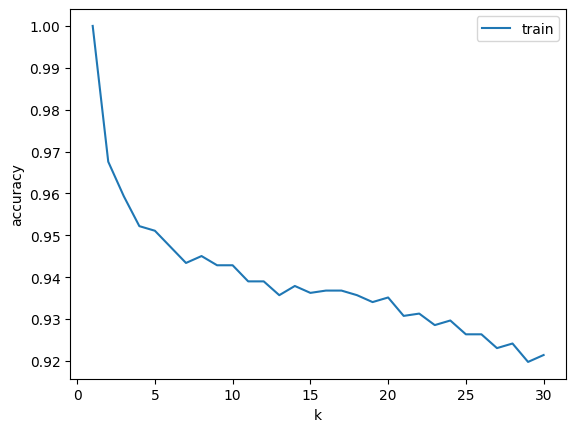

In [86]:
# Plot the mean training and validation accuracies against each value of k. Which value of 𝑘 will you use? Why?
plt.plot(range(1, max_k+1), train_acc_mean, label='train')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.show()


As we can see, when the k becomes larger, the training accuracy becomes smaller. This is because when k is large, the model becomes more simple, and the training accuracy becomes smaller. However, when k is too small, the model becomes too complex, and the training accuracy becomes smaller. Therefore, we should choose a k value that is not too large or too small. In this case, we choose k=5.

# 2. The Naive Bayes Classifier

Recall from the lecture notes that the naive Bayes classifier works as follows. We are trying to approximate an unknown function $$f:V \rightarrow \mathcal{O}$$
where $V$ is our feature space and our output space $\mathcal{O} = \{c_1, c_2, ... c_K\}$ is a finite set of classes.

The naive Bayes classifier does this by building a model that assigns the class label $\hat{y} = c_k$ as follows:
$$
\hat{y} = \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)
$$
i.e., the $k$ that maximises this quantity.

In practice, multiplying all the $p(x_i| c_k)$ together is going to give some very small values. Therefore, we can take the log to make it easier to compute:
\begin{align}
\hat{y} &= \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)= \text{argmax}_k log(p(c_k)\prod_i p(x_i| c_k))\\
&=\text{argmax}_k log(p(c_k)) + \sum_i log(p(x_i|c_k))
\end{align}

If we choose that $p(x_i|c_k)$ is given by a normal distribution with mean $\mu_k$ and variance $\sigma_k^2$, then we obtain the following expression:

\begin{align}
\hat{y} &=\text{argmax}_k \log(p(c_k)) + \sum_i \log(p(x_i|c_k))\\
&= \text{argmax}_k \log(p(c_k)) + \sum_i \log\left(\frac{1}{\sigma_k\sqrt{2\pi}} exp\left(\frac{-(x-\mu_k)^2}{2\sigma_k}\right)\right)\\
&= \text{argmax}_k \log(p(c_k)) - \sum_i \log\left(\sigma_k\sqrt{2\pi}\right) - \sum_i\left(\frac{(x-\mu_k)^2}{2\sigma_k}\right) \quad \text{ log-likelihood}
\end{align}

Expressing the values in terms of these sums means that they do not get so small, and it is less likely that there will be errors at the machine precision level.


How do we implement this in practice? We assume that each probability $p(x_i| c_k)$ is given by some distribution, and then given a datapoint $\vec{x}$, we plug the value into the equation for the distribution.

In this question you will: 
    (a) (Optional) implement your own version of the Gaussian naive Bayes classifier, 
    (b) (Optional) check your classifier against the implementation in sci-kit learn, 
    (c) compare the accuracy of the scikit-learn naive Bayes classifier with the accuracy of the k-nearest neighbours classifier, and 
    (d) run cross-validation to verify whether the kNN classfier or the Gaussian naive Bayes classifier performs better on this dataset.

## (Optional) Part (a) Implementing Gaussian naive Bayes
For this question we will make the assumption that each feature is described by a normal (also called Gaussian) distribution. The procedure is as follows:
1. Divide the training data by class
2. Calculate mean and standard deviation per class and per feature
4. For each datapoint in the validation set, calculate the log-likelihood for each class and for each feature (Hint: use the function `scipy.stats.norm.logpdf`)
5. Combine these values together with the probability of the class according to the log-likelihood equation above 即是将对数似然和先验概率相加
6. Choose the class with the highest value

In [87]:
from sklearn.datasets import load_breast_cancer
from scipy.stats import norm

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
Y = data.target

# Split the training data Xtr into training and validation sets with an 80:20 split. 
Xtr, Xval, Ytr, Yval = train_test_split(X, Y, test_size=0.2, random_state=10)

#Separate the training set into classes, so you have one set of data for each class 即是将训练集分为两类，一类是Ytr==1，一类是Ytr==0
Xtr_class0 = Xtr[Ytr==0]
Xtr_class1 = Xtr[Ytr==1]

# Calculate the means and standard deviations for each class, for each feature. 计算每个类别每个特征的均值和标准差
# mu为均值，sigma为标准差
# axis=0表示对每一列求均值，即对每个特征求均值

# Class 0
mu_class0 = np.mean(Xtr_class0, axis=0) 
sigma_class0 = np.std(Xtr_class0, axis=0)

# Class 1
mu_class1 = np.mean(Xtr_class1, axis=0)
sigma_class1 = np.std(Xtr_class1, axis=0)


# Calculate the prior probability p(c_i) for each class 计算每个类别的先验概率，先验概率等于该类别的样本数除以总样本数
p_class0 = len(Xtr_class0)/len(Xtr)
p_class1 = len(Xtr_class1)/len(Xtr)


# Calculate the log-likelihood of each class for each datapoint in the validation set 计算验证集中每个数据点的每个类别的对数似然
# scipy.stats.norm.logpdf(x, loc, scale)表示计算正态分布的对数似然，x为数据点，loc为均值，scale为标准差
log_likelihood_class0 = np.zeros(len(Xval))
log_likelihood_class1 = np.zeros(len(Xval))

for i in range(len(Xval)):
    log_likelihood_class0[i] = np.sum(norm.logpdf(Xval[i], mu_class0, sigma_class0))
    log_likelihood_class1[i] = np.sum(norm.logpdf(Xval[i], mu_class1, sigma_class1))
    
# Combine the log-likelihoods with the prior probability of each class 计算每个类别的对数似然加上先验概率的对数，用于后面的比较
log_likelihood_class0 = log_likelihood_class0 + np.log(p_class0)
log_likelihood_class1 = log_likelihood_class1 + np.log(p_class1)

# Make a prediction for each datapoint in the validation set. Your predicted class is 0 if class 0 has the highest log-likelihood, and 1 if class 1 has the highest log-likelihood
Ypred = np.zeros(len(Xval))
for i in range(len(Xval)):
    if log_likelihood_class0[i] > log_likelihood_class1[i]:
        Ypred[i] = 0
    else:
        Ypred[i] = 1
        
# Calculate the accuracy of your classifier on the validation set
print('Accuracy of your classifier on the validation set is: ', accuracy_score(Yval, Ypred))

Accuracy of your classifier on the validation set is:  0.956140350877193


## (Optional) Part (b) Checking results
We now compare our results with the sklearn implementation. 

In [88]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the classifier
gnb = GaussianNB()

# Fit the classifier on the training data
gnb.fit(Xtr, Ytr)

# Make a prediction on the validation set
Ypred_sk = gnb.predict(Xval)

# Calculate the accuracy of the sklearn classifier on the validation set
print('Accuracy of sklearn\'s classifier on the validation set is: ', accuracy_score(Yval, Ypred_sk))

Accuracy of sklearn's classifier on the validation set is:  0.956140350877193


In [89]:
# Compare your predicted classes with those of the sklearn implementation.
# If they are not identical, this may be due to some differences in parameter setting. 
# They should be almost all the same, however.
print(np.sum(Ypred == Ypred_sk))
print(np.sum(Ypred != Ypred_sk))

114
0


## Part (c) Comparing k-nearest neighbours and Gaussian naive Bayes
Now, using the sklearn implementations of k-nearest neighbours and naive Bayes, retrain the naive Bayes classifier using the original training set `Xtr`, `Ytr`.
Also retrain the k-nearest neighbours classifier using `Xtr` and `Ytr`. Use the value of $k$ that you decided on using cross-validation.

Compute the accuracy of the naive Bayes classifier over the training set and the held-out test set.

Compare with the accuracy of the k-nearest neighbours classifier on each set.

Is it clear which classifier is the best on this dataset? why or why not?

In [90]:
# Instantiate the knn classifer with your chosen value of k
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Gaussian naive Bayes classifier and the knn classifier on Xtr, Ytr
gnb.fit(Xtr, Ytr)
knn.fit(Xtr, Ytr)

# Make predictions for the training set and the test set
Ypred_gnb_tr = gnb.predict(Xtr)
Ypred_gnb_test = gnb.predict(Xtest)

Ypred_knn_tr = knn.predict(Xtr)
Ypred_knn_test = knn.predict(Xtest)

# Take a look at the accuracy scores
print('Accuracy of Gaussian naive Bayes on the training set is: ', accuracy_score(Ytr, Ypred_gnb_tr))
print('Accuracy of Gaussian naive Bayes on the test set is: ', accuracy_score(Ytest, Ypred_gnb_test))

print('Accuracy of k-nearest neighbours on the training set is: ', accuracy_score(Ytr, Ypred_knn_tr))
print('Accuracy of k-nearest neighbours on the test set is: ', accuracy_score(Ytest, Ypred_knn_test))


Accuracy of Gaussian naive Bayes on the training set is:  0.9318681318681319
Accuracy of Gaussian naive Bayes on the test set is:  0.956140350877193
Accuracy of k-nearest neighbours on the training set is:  0.9494505494505494
Accuracy of k-nearest neighbours on the test set is:  0.9210526315789473


## Part (d) Using cross-validation for statistical validation
Earlier we used cross-validation to select the model parameters we would be using. We can also use it another way: to provide statistical information about which model is best. We will set up cross-validation on the whole dataset, with 10 folds.
即是使用交叉验证来提供关于哪个模型最好的统计信息。

 - Compute the accuracy for each model on the test set on each fold. 计算每个模型在每个fold上的测试集准确率
 - Calculate the mean accuracy across folds. Which model performs best? 计算每个模型在所有fold上的平均准确率，哪个模型表现最好？
 - Make a box-plot of the spread of scores of each model. Is there a clear difference between model performance? 画出每个模型的准确率箱线图，模型之间有明显的差异吗？
 - Perform a paired t-test on the accuracy scores. What can you conclude about the performance of the two models? 对准确率进行配对t检验，你能得出什么关于两个模型性能的结论？


In [91]:
# Set up a k-fold cross-validation with 10 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=10)

In [92]:
# For each fold, fit each model on the training data and compute accuracy on the test data.

# Gaussian naive Bayes
gnb_acc = []
for train_index, test_index in kf.split(X):
    gnb.fit(X[train_index], Y[train_index])
    Ypred_gnb = gnb.predict(X[test_index])
    gnb_acc.append(accuracy_score(Y[test_index], Ypred_gnb))
    
# k-nearest neighbours
knn_acc = []
for train_index, test_index in kf.split(X):
    knn.fit(X[train_index], Y[train_index])
    Ypred_knn = knn.predict(X[test_index])
    knn_acc.append(accuracy_score(Y[test_index], Ypred_knn))

In [93]:
# Compute the mean and standard devation of the accuracies for each model.
# Does one model perform better?
print('Mean accuracy of Gaussian naive Bayes is: ', np.mean(gnb_acc))
print('Standard deviation of Gaussian naive Bayes is: ', np.std(gnb_acc))

print('Mean accuracy of k-nearest neighbours is: ', np.mean(knn_acc))
print('Standard deviation of k-nearest neighbours is: ', np.std(knn_acc))

Mean accuracy of Gaussian naive Bayes is:  0.9401629072681704
Standard deviation of Gaussian naive Bayes is:  0.03185429397464076
Mean accuracy of k-nearest neighbours is:  0.9348997493734336
Standard deviation of k-nearest neighbours is:  0.022605852898590337


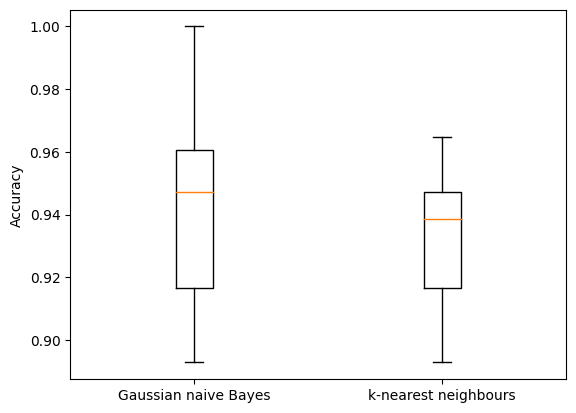

In [94]:
# Make a boxplot of the accuracy scores. (Use plt.boxplot). 
# Is there a clear difference between the models?
plt.boxplot([gnb_acc, knn_acc], labels=['Gaussian naive Bayes', 'k-nearest neighbours'])
plt.ylabel('Accuracy')
plt.show()

In [95]:
# Perform a paired t-test (you can use the function scipy.stats.ttest_rel). 
# What do you conclude about the performance of the two models?
from scipy.stats import ttest_rel

t, p = ttest_rel(gnb_acc, knn_acc)
print('t = ', t)
print('p = ', p)

t =  0.7579367289598681
p =  0.46786980639499065


t值表示两个模型的准确率差异的大小，t值越大，差异越大，p值越小，差异越显著。
此时t值为-0.75，p值为0.46，说明两个模型的准确率差异不显著。由于p值为0.46，远高于0.05，我们不能拒绝零假设。这意味着根据这个检验的结果，我们没有足够的证据表明高斯朴素贝叶斯模型和K-最近邻模型在准确率上有显著差异。

# 3. Linear Regression
In linear regression we make the assumption that the data $(x_i, y_i)$ can be modelled by a function of the form
$$ \hat{y_i} = f(\vec{x}_i)= \sum_j a_j x_{ij}  + b_i$$

Recall that we can express this in a matrix format by:
$$ \hat{\vec{y}} = f(X)= X\Theta$$

where 
$$ X=\begin{pmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} &1 \\
\vdots & \vdots & \ldots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,n} & 1
\end{pmatrix}, \quad \vec{y}=\begin{pmatrix} y_1 \\ \vdots \\y_N \end{pmatrix}, \quad \Theta=\begin{pmatrix} a_1 \\ \vdots \\a_n\\b \end{pmatrix}$$

We saw in lectures that the optimal value of $\Theta$ is given by setting
$$ \Theta = (X^T X)^{-1} X^T \vec{y}$$

The quantity $(X^T X)^{-1} X^T$ is called the psuedoinverse of X, and can be computed using the function `np.linalg.pinv`.

We will (a) perform a linear regression on the diabetes dataset. You can load this dataset using the function `load_diabetes` from `sklearn.datasets`. (b) compute the mean squared error and the R^2, and (c) compare your results with the built in function in sklearn (`sklearn.linear_model.LinearRegresion()`). You should get the same results.

In [124]:
# import statments here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part (a) Implementing linear regression

In [96]:
# Load the diabetes dataset 
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
Y = data.target

# Split the dataset into training and test, using test_size=0.2
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=0.2, random_state=10)
Xtr

array([[ 0.00538306, -0.04464164,  0.05954058, ...,  0.05091436,
        -0.00422151, -0.03007245],
       [-0.02730979, -0.04464164,  0.08001901, ...,  0.00331192,
        -0.02952643,  0.03620126],
       [ 0.0090156 , -0.04464164, -0.02452876, ..., -0.00259226,
        -0.02139531,  0.00720652],
       ...,
       [-0.05273755,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03606033, -0.04249877],
       [-0.00551455,  0.05068012, -0.00836158, ..., -0.00259226,
         0.08059005,  0.00720652],
       [-0.03457486,  0.05068012, -0.02560657, ..., -0.01550765,
         0.01482098,  0.04034337]])

In [123]:
# Add a column of ones to Xtrain and Xtest for the intercept term 即是在Xtr和Xtest中添加一列全为1的列，用于计算截距
# hstack()表示将两个矩阵按列合并
Xtr = np.hstack((np.ones((len(Xtr), 1)), Xtr))
Xtest = np.hstack((np.ones((len(Xtest), 1)), Xtest))

In [115]:
# Calculate the value of the coefficients theta. You can use the function np.linalg.pinv 计算theta值，用pinv()函数，即是求矩阵的伪逆
# theta = (X^T * X)^(-1) * X^T * Y 表示最小二乘法的解
# pinv()表示求矩阵的伪逆
theta = np.linalg.pinv(Xtr) @ Ytr # @表示矩阵乘法
print(theta)

[ 152.25553849   -3.88733451 -225.62527795  517.90438059  328.31029449
 -727.20288812  410.94784789   80.2547038   218.18152407  704.26613704
   40.02330705]


## Part (b) Computing performance metrics

In [118]:
# Make a prediction on the test set by applying the coefficients theta to the test set
Ypred = Xtest @ theta

In [122]:
# Calculate the mean squared error and the R^2. 

# Mean squared error
mse = np.mean((Ytest - Ypred)**2)
print('Mean squared error is: ', mse)

# 用内置函数计算均方误差
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Ytest, Ypred)
print('SK-Mean squared error is: ', mse)

# R^2
r2 = 1 - np.sum((Ytest - Ypred)**2)/np.sum((Ytest - np.mean(Ytest))**2)
print('R^2 is: ', r2)

# 用内置函数计算R^2
from sklearn.metrics import r2_score
r2 = r2_score(Ytest, Ypred)
print('SK-R^2 is: ', r2)

Mean squared error is:  2911.811886119178
SK-Mean squared error is:  2911.811886119178
R^2 is:  0.5341988244945841
SK-R^2 is:  0.5341988244945841


## Part (c) Checking results
Compare your results with the built in function `sklearn.linear_model.LinearRegression()`

In [125]:
# Instantiate the linear regression
regr = linear_model.LinearRegression()

# Fit the model on the training data
regr.fit(Xtr, Ytr)

# Make a prediction on the test set
Ypred_sk = regr.predict(Xtest)

# Calculate the mean squared error and the R^2
# Mean squared error
mse = mean_squared_error(Ytest, Ypred_sk)
print('SK-Mean squared error is: ', mse)

# R^2
r2 = r2_score(Ytest, Ypred_sk)
print('SK-R^2 is: ', r2)


SK-Mean squared error is:  2911.8118861191765
SK-R^2 is:  0.5341988244945843


Visualise the perfomance of the regression by plotting your predicted values vs target values on a scatter plot, and drawing a line y=x. If all predictions were perfect, the predicted values would lie on the line.

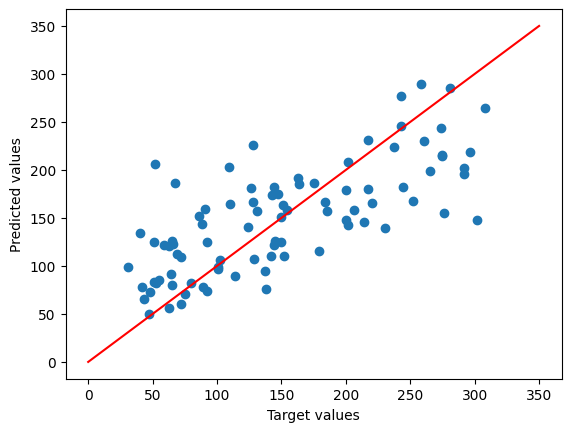

In [126]:
# Plot predicted values vs target values on a scatter plot, and drawing a line y=x
plt.scatter(Ytest, Ypred)
plt.plot([0, 350], [0, 350], 'r')
plt.xlabel('Target values')
plt.ylabel('Predicted values')
plt.show()


# (Optional) Polynomial regression
The term 'linear' in linear regression refers only to the coefficients $\theta$. We can in fact compute polynomial terms in the data and perform linear regression over this extended dataset to get a better fit to the data.

To compute polynomial terms in the data automatically, you can use the class `sklearn.preprocessing.PolynomialFeatures`. To find out how to use it, look at the guidance (you can type `help(PolynomialFeatures)` once you have imported it).

The following small dataset (in the cell below) gives a relationship between temperature and yield for an experiment. Use cross-validation to select the degree of the polynomial that best fits this data.

Plot the mean squared error against degree on the training set and on the validation set. Which degree of polynomial best fits this data?

In [127]:
# Data
X = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100]).reshape(-1, 1)
y = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3,3.1,2.8,3.3,3.5,3]).reshape(-1, 1)

In [130]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Set up a k-fold cross-validation with 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=10)

# Set a variable max_degree to 10
max_degree = 10

# Inititalise two variables to store the training accuracies and validation accuracies
train_acc = np.zeros(max_degree*5)
val_acc = np.zeros(max_degree*5)

# Loop over the degrees
for degree in range(max_degree):
    
    # Instantiate a polynomial feature object with the current degree
    poly = PolynomialFeatures(degree=degree+1)
    
    # Transform the data to add polynomial features
    X_poly = poly.fit_transform(X)
    
    # Loop over the cross-validation splits
    for i, (train_index, val_index) in enumerate(kf.split(X_poly)):
        
        # Split the data into training and validation sets
        Xtr, Xval = X_poly[train_index], X_poly[val_index]
        Ytr, Yval = y[train_index], y[val_index]
        
        # Fit the linear regression model on the training data
        regr.fit(Xtr, Ytr)
        
        # Make predictions on the training and validation sets
        Ypred_train = regr.predict(Xtr)
        Ypred_val = regr.predict(Xval)
        
        # Calculate the mean squared error on the training and validation sets
        # train_mse
        train_acc[degree*5+i] = mean_squared_error(Ytr, Ypred_train)
        val_acc[degree*5+i] = mean_squared_error(Yval, Ypred_val)
        
# Calculate the mean training and validation accuracies across splits for each degree
train_acc_mean = np.mean(train_acc.reshape(max_degree, 5), axis=1)
val_acc_mean = np.mean(val_acc.reshape(max_degree, 5), axis=1)

print(train_acc_mean)
print(val_acc_mean)


[0.12425651 0.04573544 0.03596965 0.03402778 0.03402778 0.03402778
 0.03402778 0.03402778 0.03402778 0.03402778]
[0.22571919 0.06872769 0.06638482 0.09516668 0.09516667 0.09516667
 0.09516667 0.09516667 0.09516667 0.09516667]


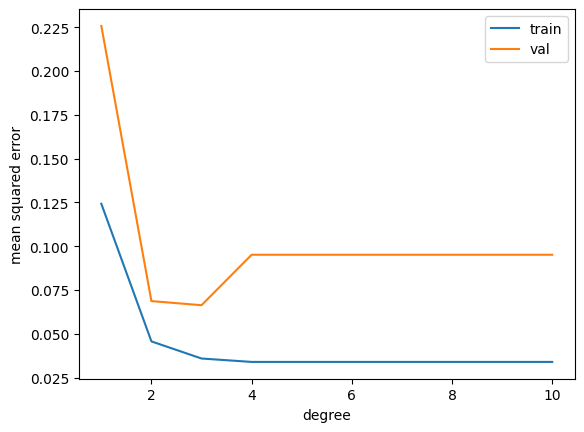

In [131]:
# Plot the mean squared error against degree on the training set and on the validation set
plt.plot(range(1, max_degree+1), train_acc_mean, label='train')
plt.plot(range(1, max_degree+1), val_acc_mean, label='val')
plt.xlabel('degree')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

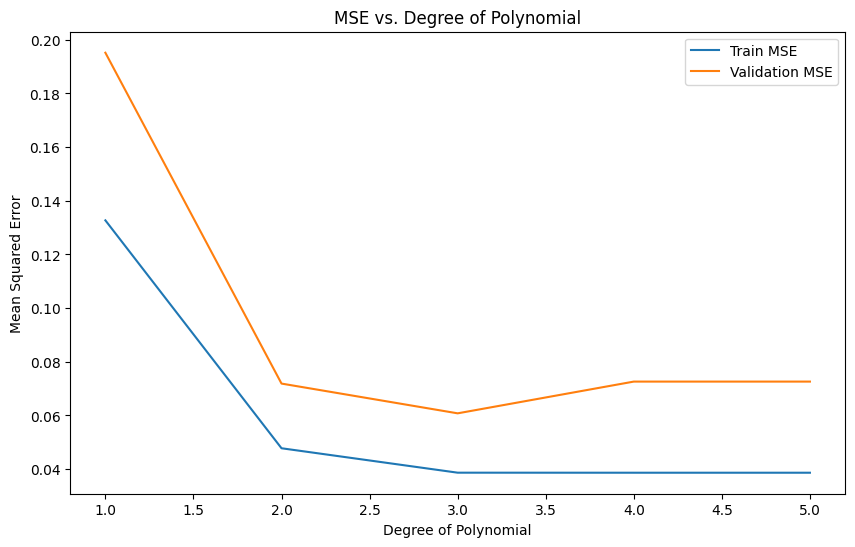

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# 数据
X = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100]).reshape(-1, 1)
y = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3,3.1,2.8,3.3,3.5,3]).reshape(-1, 1)

# 初始化变量来存储训练和验证的MSE
train_mse = []
val_mse = []

# 测试不同的多项式度数
degrees = range(1, 6)

for degree in degrees:
    # 创建一个多项式特征生成器
    polynomial_features = PolynomialFeatures(degree=degree)
    
    # 创建一个线性回归模型
    linear_regression = LinearRegression()
    
    # 创建一个管道，先生成多项式特征，然后应用线性回归
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    # 使用管道训练模型
    pipeline.fit(X, y)
    
    # 计算训练集上的MSE
    y_train_predict = pipeline.predict(X)
    train_mse.append(mean_squared_error(y, y_train_predict))

    # 使用交叉验证计算验证集上的MSE
    scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=10)
    val_mse.append(-np.mean(scores))

# 绘制MSE和多项式度数的关系图
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, label='Train MSE')
plt.plot(degrees, val_mse, label='Validation MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Degree of Polynomial')
plt.legend()
plt.show()

# 返回训练和验证MSE
# train_mse, val_mse

# 4. Single Layer Neural Network

In this question we apply a single-layer neural network to a linearly separable toy data set.

- make_moons: 生成两个半圆形的数据集
- make_circles: 生成两个圆形的数据集
- make_classification: 生成两个线性可分的数据集
- MLPClassifier: 多层感知机分类器
- Perceptron: 感知机分类器

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

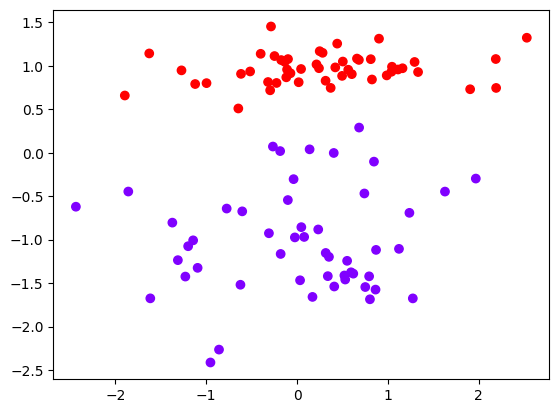

(100, 2)


In [147]:
# Toy Problems
# 生成两个线性可分的数据集，n_features表示特征数，n_redundant表示冗余特征数，n_informative表示信息特征数，n_clusters_per_class表示每个类别的簇数
X1, y1 = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1)

fig1, ax1 = plt.subplots()
ax1.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()

print(X1.shape)
# X1两列为两个特征，即x1和x2，y1为标签，即类别

In [135]:
# Fit a single-layer neural network to the data.即使用单层神经网络拟合数据（感知机）
nn1=Perceptron(alpha=1, max_iter=1000) # alpha为学习率，max_iter为最大迭代次数
model=nn1.fit(X1,y1)

(Optional) Plot the line that the perceptron is modelling. Look at the documentation to find out how you can get the values of the weights and the bias.

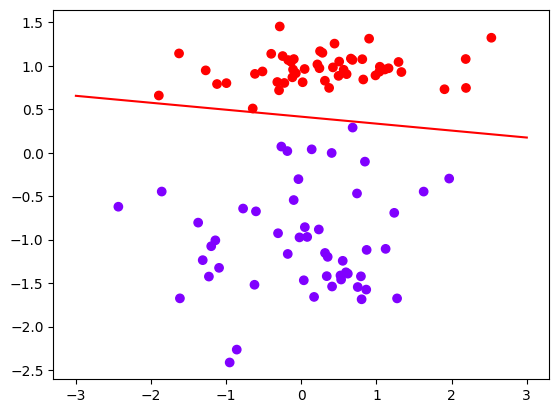

In [143]:
# Plot the line that the perceptron is modelling

# Get the weights and bias from the model
# model的系数为权重w，model的截距为偏置b
w = model.coef_[0]
b = model.intercept_[0]

# Plot the line
x1 = np.linspace(-3, 3, 100)
x2 = -(w[0]/w[1])*x1 - b/w[1] # x2=-(w1/w2)*x-b/w2； w1*x1+w2*x2+b=0
plt.plot(x1, x2, 'r')
plt.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()


We can visualise the performance of this network again using a scatter plot, and colour the points using predicted class. Is the network able to give the right classification for each point?

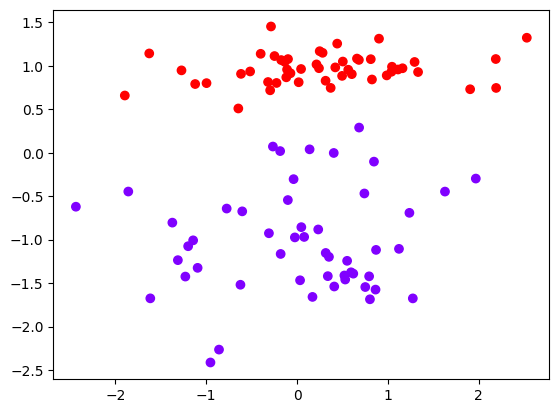

Accuracy of the perceptron is:  1.0


In [145]:
ypred1=model.predict(X1)

# Plot the predictions
fig1, ax1 = plt.subplots()
ax1.scatter(X1[:,0],X1[:,1],c=ypred1, cmap='rainbow') #scatter() 参数1为x轴数据，参数2为y轴数据
plt.show()

# Compute the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the perceptron is: ', accuracy_score(y1, ypred1))

# 5. Multi-Layer NN on Toy Problems
In this question we consider two toy problems in which the classes are not linearly separable. In the first example the two classes form moon shapes.

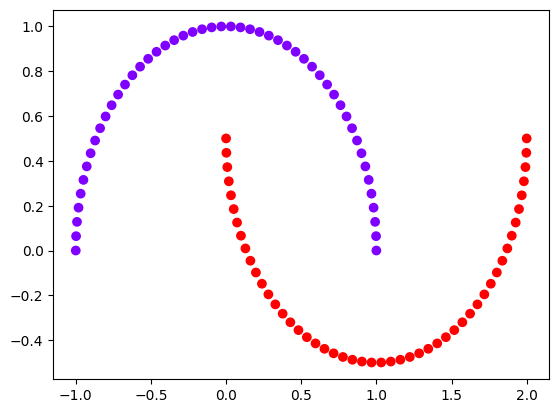

In [148]:
X2, y2 = make_moons()
fig2, ax2 = plt.subplots()
ax2.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')

Try fitting a single-layer neural network to the data. 
Comment on the performance and hypothesise what might be the source of the errors.

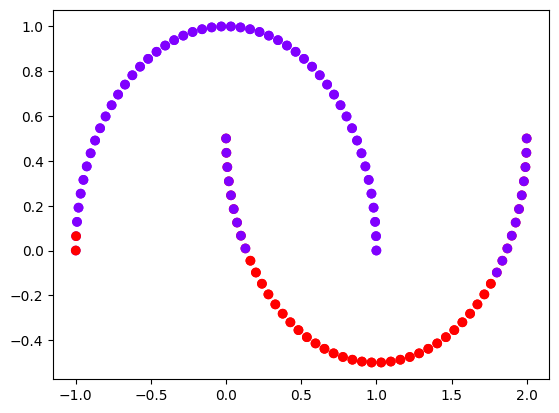

In [149]:
nn2=Perceptron(alpha=1, max_iter=1000)
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)

ax2.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
fig2


We can now try to fit a multi-layer NN to the same data

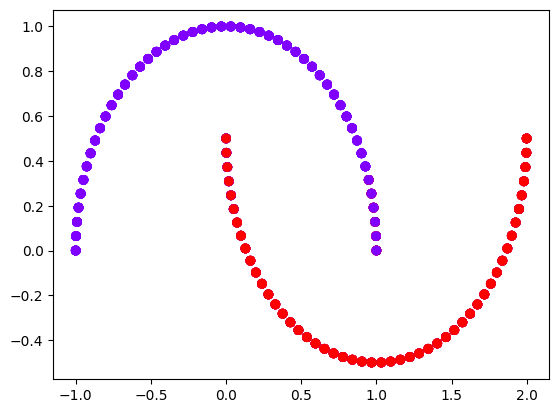

In [162]:
# hidden_layer_sizes=(x,y,z, ...) 表示隐藏层的神经元个数，x表示第一层隐藏层的神经元个数，y表示第二层隐藏层的神经元个数，z表示第三层隐藏层的神经元个数
nn2=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000)
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)
ax2.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
fig2

This NN has 4 hidden layers each with 10 neurons. The parameter
`hidden_layer_sizes=(x,y,z, ...)` identifies the number of neurons in each layer. Try experimenting with different configurations of hidden layers to see the effect on performance.

Investigate the parameter `activation`. What are the different activation functions?

The activation functions are:
- `identity`: $f(x) = x$
- `logistic`: $f(x) = \frac{1}{1+e^{-x}}$
- `tanh`: $f(x) = \tanh(x)$
- `relu`: $f(x) = \max(0, x)$
- `prelu`: $f(x) = \max(\alpha x, x)$
- `softmax`: $f(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}}$
- `maxout`: $f(x)_i = \max_{j \in [1, d]} x_{ij}$

We now introduce another toy classification problem based on classes in the form of two circles. Experiment with using different NN architectures to fit this data and plot the results.

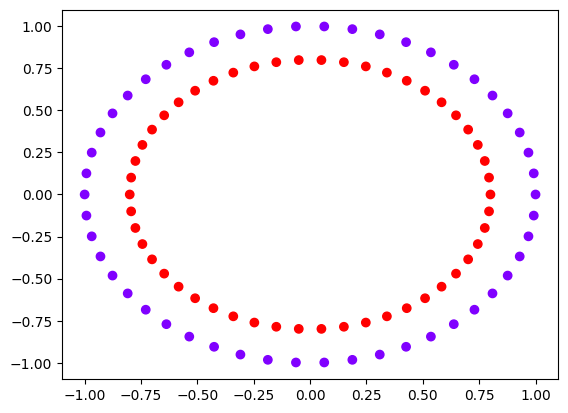

In [163]:
X3, y3 = make_circles()
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=y3, cmap='rainbow')
plt.show()

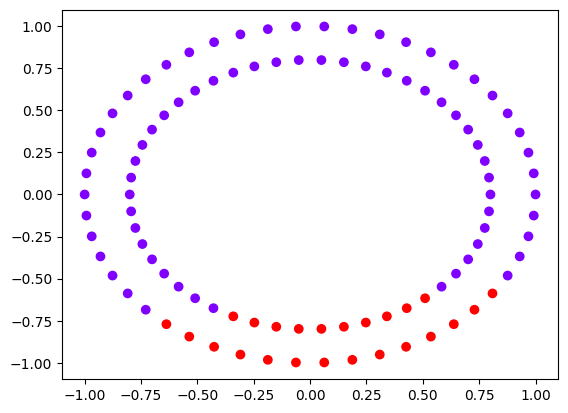

In [169]:
# Fit a single-layer NN to the data
nn3=Perceptron(alpha=1, max_iter=1000)
model3=nn3.fit(X3,y3)

ypred3=model3.predict(X3)
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=ypred3, cmap='rainbow')
plt.show()

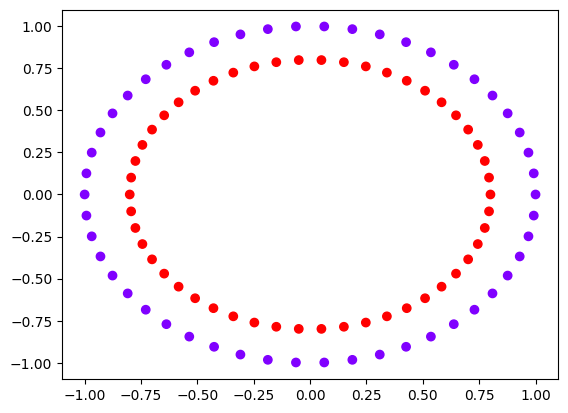

In [170]:
# Fit a multi-layer NN to the data
nn3=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000)
model3=nn3.fit(X3,y3)

ypred3=model3.predict(X3)
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=ypred3, cmap='rainbow')
plt.show()